# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')
fpath='/content/drive/MyDrive/ia-final-project/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing dataset

In [ ]:
colnames = [ 'Customer ID',	'Age',	'Gender',	'Item Purchased',	'Category',	'Purchase Amount (USD)',	'Location',	'Size',	'Color',	'Season',	'Review Rating',
            'Subscription Status',	'Shipping Type',	'Discount Applied',	'Promo Code Used',	'Previous Purchases',	'Payment Method',	'Frequency of Purchases' ];
df = pd.read_csv(fpath+'shopping_trends.csv', names=colnames, header=None)

# Showing dataset

In [ ]:
df.head(48842)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


# Data cleaning

## Dropping useless feature

In [ ]:
del df['Customer ID'];
del df['Item Purchased'];
del df['Subscription Status'];
del df['Promo Code Used'];

## Checking if data needs to be cleaned



In [ ]:
print('How many NaN values by attribute:')
print(df.isnull().sum())
print('How many 0 values by attribute:')
print((df==0).sum())

How many NaN values by attribute:
Age                       0
Gender                    0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Shipping Type             0
Discount Applied          0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64
How many 0 values by attribute:
Age                       0
Gender                    0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Shipping Type             0
Discount Applied          0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


# Data transformation

## Reducing data information

In [ ]:
df = df[df['Category'] != 'Accessories']


def categorize_color(color):
    light_colors = {'Beige', 'Cyan', 'Gold', 'Lavender', 'Peach', 'Pink', 'Silver', 'White', 'Yellow'}
    dark_colors = {'Black', 'Brown', 'Charcoal', 'Gray', 'Maroon', 'Olive', 'Purple'}
    colorful_colors = {'Blue', 'Green', 'Indigo', 'Magenta', 'Orange', 'Red', 'Teal', 'Turquoise', 'Violet'}

    if color in light_colors:
        return 'Light'
    elif color in dark_colors:
        return 'Dark'
    elif color in colorful_colors:
        return 'Colorful'

df['Color'] = df['Color'].apply(categorize_color)

## Encoding categorical attributes as enum

In [ ]:
laben = pp.LabelEncoder()

laben.fit(df['Age'])
df['Age'] = laben.transform(df['Age'])
print('Age\n', laben.classes_)

laben.fit(df['Gender'])
df['Gender'] = laben.transform(df['Gender'])
print('\nGender\n', laben.classes_)

laben.fit(df['Category'])
df['Category'] = laben.transform(df['Category'])
print('\nCategory\n', laben.classes_)

laben.fit(df['Location'])
df['Location'] = laben.transform(df['Location'])
print('\nLocation\n', laben.classes_)

laben.fit(df['Color'])
df['Color'] = laben.transform(df['Color'])
print('\nColor\n', laben.classes_)

laben.fit(df['Season'])
df['Season'] = laben.transform(df['Season'])
print('\nSeason\n', laben.classes_)

laben.fit(df['Size'])
df['Size'] = laben.transform(df['Size'])
print('\nSize\n', laben.classes_)

laben.fit(df['Frequency of Purchases'])
df['Frequency of Purchases'] = laben.transform(df['Frequency of Purchases'])
print('\nFrequency of Purchases\n', laben.classes_)

laben.fit(df['Purchase Amount (USD)'])
df['Purchase Amount (USD)'] = laben.transform(df['Purchase Amount (USD)'])
print('\nPurchase Amount (USD)\n', laben.classes_)

laben.fit(df['Shipping Type'])
df['Shipping Type'] = laben.transform(df['Shipping Type'])
print('\nShipping Type\n', laben.classes_)

laben.fit(df['Review Rating'])
df['Review Rating'] = laben.transform(df['Review Rating'])
print('\nReview Rating\n', laben.classes_)

laben.fit(df['Discount Applied'])
df['Discount Applied'] = laben.transform(df['Discount Applied'])
print('\nDiscount Applied\n', laben.classes_)

laben.fit(df['Previous Purchases'])
df['Discount Applied'] = laben.transform(df['Previous Purchases'])
print('\nPrevious Purchases\n', laben.classes_)

laben.fit(df['Payment Method'])
df['Payment Method'] = laben.transform(df['Payment Method'])
print('\nPayment Method\n', laben.classes_)

Age
 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70]

Gender
 ['Female' 'Male']

Category
 ['Clothing' 'Footwear' 'Outerwear']

Location
 ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']

Color
 ['Colorful' 'Dark' 'Light']

Season
 ['Fall' 'Spring' 'Summer' 'Winter']

Size
 ['L' 'M' 'S' 'XL']

Frequency of Purchases
 ['Annually' 'Bi-Weekly' 'Every 3 M

## Showing dataset transformed

In [ ]:
df.head(20)

,Age,Gender,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,37,1,0,33,16,0,1,3,6,1,13,14,5,3
1,1,1,0,44,18,0,1,3,6,1,1,2,1,3
2,32,1,0,53,20,2,1,1,6,2,22,23,2,6
3,3,1,1,70,38,1,1,1,10,3,48,49,4,6
4,27,1,0,29,36,1,0,1,2,2,30,31,4,0
5,28,1,1,0,49,1,2,2,4,4,13,14,5,6
6,45,1,0,65,25,1,1,0,7,2,48,49,1,5
7,9,1,0,14,17,0,1,3,7,2,18,19,2,6
8,8,1,2,77,47,0,2,2,1,1,7,8,5,0
10,35,1,1,14,3,0,1,0,16,5,25,26,0,1


# Understanding my data

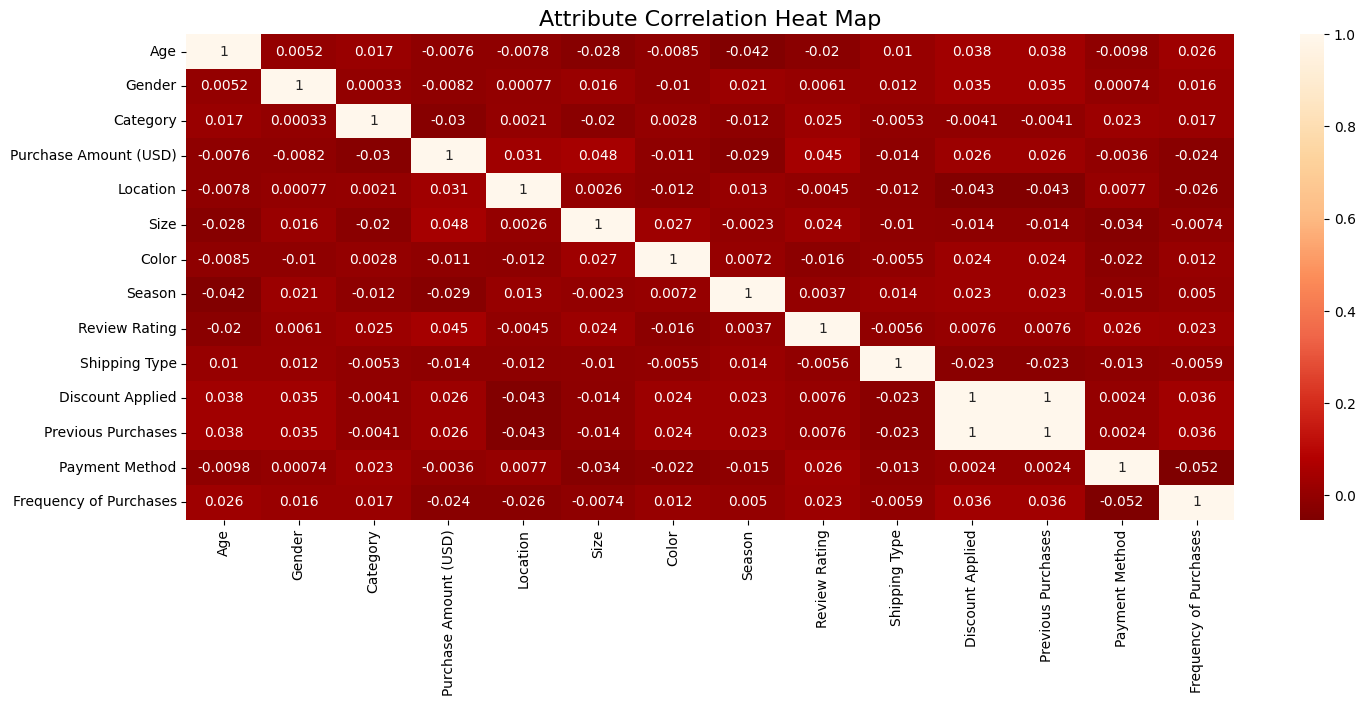

In [ ]:
color = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

plt.figure(figsize = (15,7))
value = randint(0,len(color)-4)

df.corr()
sns.heatmap(df.corr(),annot=True,cmap=color[value])
plt.title("Attribute Correlation Heat Map",fontsize = 16)
plt.tight_layout(pad=0.5)
plt.show()

# Data normalization

In [ ]:
X = df.drop(columns=['Category'])
y = df['Category']

X.head(200)

,Age,Gender,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,37,1,33,16,0,1,3,6,1,13,14,5,3
1,1,1,44,18,0,1,3,6,1,1,2,1,3
2,32,1,53,20,2,1,1,6,2,22,23,2,6
3,3,1,70,38,1,1,1,10,3,48,49,4,6
4,27,1,29,36,1,0,1,2,2,30,31,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,42,1,79,43,1,0,1,22,2,23,24,1,5
294,52,1,0,29,1,2,1,21,5,18,19,2,2
296,7,1,54,13,2,2,1,23,0,18,19,2,6
297,30,1,6,7,3,1,2,19,4,3,4,2,1


In [ ]:
colnames = ['Age',
            'Gender',
            'Purchase Amount (USD)',
            'Location',
            'Size',
            'Color',
            'Season',
            'Frequency of Purchases',
            'Review Rating',
            'Payment Method'];
scaler = pp.MinMaxScaler()
X[colnames] = scaler.fit_transform(X[colnames])

# Spliting dataset into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=145)

print("0: ",(y_train==0).sum())
print("1: ",(y_train==1).sum())
over_sampler = RandomOverSampler(random_state=100)
X_train, y_train = over_sampler.fit_resample(X_train, y_train)

print("After:")
print("0: ",(y_train==0).sum())
print("1: ",(y_train==1).sum())

0:  1230
1:  403
After:
0:  1230
1:  1230


# Using random forest

In [ ]:
clf = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=250)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=250)

# Metrics

In [ ]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[499   8   0]
 [183  12   1]
 [ 92   2   1]]


In [ ]:
f1_score = metrics.f1_score(y_test, clf.predict(X_test), average='weighted')
accuracy = metrics.accuracy_score(y_test, clf.predict(X_test))
precision = metrics.precision_score(y_test, clf.predict(X_test), average='weighted')
recall = metrics.recall_score(y_test, clf.predict(X_test), average='weighted')

print("F1 score: ", f1_score)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

F1 score:  0.5244733318005639
Accuracy:  0.6416040100250626
Precision:  0.603099538840053
Recall:  0.6416040100250626
